# MSDS 7331 Data Mining Lab 1
Profesor: Dr. Jake Drew  
Team: Steven Hayden, Josephine MacDaniel, Afreen Siddiqui, & Eduardo Cantu

In [15]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt

## Business Understanding


## Data Meaning Type

## Data Quality

In [16]:


# read in the data from 2015 and 2016

Accident_2015_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2015.csv',low_memory=False)
Accident_2016_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2016.csv',low_memory=False)
Distract_2015_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/distract_2015.csv',low_memory=False)
Distract_2016_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/distract_2016.csv',low_memory=False) 

#combines the 2015 and 2016 file into one data frame
Accident_df = pd.concat([Accident_2016_df,Accident_2015_df])
Distract_df =pd.concat([Distract_2015_df,Distract_2016_df])

#merg the distract data set and the accident data set
Accident_df  = pd.merge(Accident_df, Distract_df,  how='left', left_on=['consecutive_number'], right_on = ['consecutive_number'])

#Data frame description 
Accident_df.head()
Accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198132 entries, 0 to 198131
Data columns (total 76 columns):
Unnamed: 0_x                                                   198132 non-null int64
state_number_x                                                 198132 non-null int64
state_name                                                     198132 non-null object
consecutive_number                                             198132 non-null int64
number_of_vehicle_forms_submitted_all                          198132 non-null int64
number_of_motor_vehicles_in_transport_mvit                     198132 non-null int64
number_of_parked_working_vehicles                              198132 non-null int64
number_of_forms_submitted_for_persons_not_in_motor_vehicles    198132 non-null int64
number_of_persons_not_in_motor_vehicles_in_transport_mvit      198132 non-null int64
number_of_persons_in_motor_vehicles_in_transport_mvit          198132 non-null int64
number_of_forms_submitted_for_persons_

## Simple Statistics

In [17]:
# Number of people who died in a car accident based on the given data for 2015 and 2016 
percentDeath = float(sum(Accident_df.number_of_fatalities)/len(Accident_df)) * 100
Deaths = sum(Accident_df.number_of_fatalities)
print('Number of people who died in a car accident in 2015 & 2016: ', Deaths)

Number of people who died in a car accident in 2015 & 2016:  217931


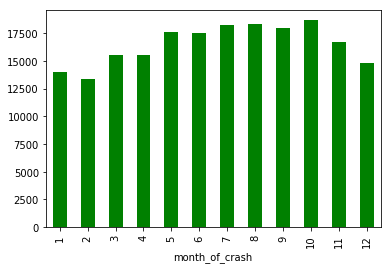

In [18]:
# Monthly data for accidents
fatility_counts = pd.crosstab([Accident_df['month_of_crash']], Accident_df.number_of_fatalities)
fatility_counts.plot(kind='bar', stacked=True, color=['green'], legend=False)

In [19]:
Accident_df.groupby(['month_of_crash']).aggregate({'number_of_fatalities':sum}).sort_values('number_of_fatalities',ascending=False).head(4)

,number_of_fatalities
month_of_crash,
10,20376
7,20142
8,20138
9,19589


In [20]:
# Monthly data for accidents
acci_count=Accident_df.groupby(['month_of_crash']).count().reset_index()

acci_count.rename(columns={'Unnamed: 0_x': 'accident_count'}, inplace=True)
#acci_count
#type(acci_count)
acci_count_sorted = acci_count.sort_values('accident_count',ascending=False)
acci_count_sorted.head(4)


,month_of_crash,accident_count,state_number_x,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,Unnamed: 0_y,state_number_y,vehicle_number,driver_distracted_by,driver_distracted_by_name
9,10,18671,18671,18671,18671,18671,18671,18671,18671,18671,...,18671,18671,18671,18671,18671,18418,18418,18418,18418,18418
7,8,18357,18357,18357,18357,18357,18357,18357,18357,18357,...,18357,18357,18357,18357,18357,18220,18220,18220,18220,18220
6,7,18261,18261,18261,18261,18261,18261,18261,18261,18261,...,18261,18261,18261,18261,18261,18138,18138,18138,18138,18138
8,9,17926,17926,17926,17926,17926,17926,17926,17926,17926,...,17926,17926,17926,17926,17926,17798,17798,17798,17798,17798


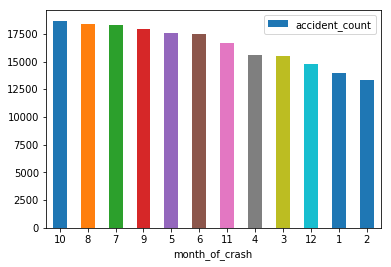

In [21]:
# Monthly data for accidents
acci_count_sorted.plot.bar(x='month_of_crash', y='accident_count', rot=0)

In [22]:
#state wise analysis for fatal accidents:
acci_count_bystate=Accident_df.groupby(['state_name']).count().reset_index()
acci_count_bystate.rename(columns={'Unnamed: 0_x': 'accident_count_bystate'}, inplace=True)
acci_count_bystate_sorted = acci_count_bystate.sort_values('accident_count_bystate',ascending=False)
acci_count_bystate_sorted.head(10)

,state_name,accident_count_bystate,state_number_x,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,...,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,Unnamed: 0_y,state_number_y,vehicle_number,driver_distracted_by,driver_distracted_by_name
43,Texas,20053,20053,20053,20053,20053,20053,20053,20053,20053,...,20053,20053,20053,20053,20053,19748,19748,19748,19748,19748
4,California,19051,19051,19051,19051,19051,19051,19051,19051,19051,...,19051,19051,19051,19051,19051,18778,18778,18778,18778,18778
9,Florida,16557,16557,16557,16557,16557,16557,16557,16557,16557,...,16557,16557,16557,16557,16557,16152,16152,16152,16152,16152
10,Georgia,8271,8271,8271,8271,8271,8271,8271,8271,8271,...,8271,8271,8271,8271,8271,8168,8168,8168,8168,8168
33,North Carolina,7854,7854,7854,7854,7854,7854,7854,7854,7854,...,7854,7854,7854,7854,7854,7772,7772,7772,7772,7772
38,Pennsylvania,6652,6652,6652,6652,6652,6652,6652,6652,6652,...,6652,6652,6652,6652,6652,6650,6650,6650,6650,6650
35,Ohio,6495,6495,6495,6495,6495,6495,6495,6495,6495,...,6495,6495,6495,6495,6495,6426,6426,6426,6426,6426
22,Michigan,5821,5821,5821,5821,5821,5821,5821,5821,5821,...,5821,5821,5821,5821,5821,5720,5720,5720,5720,5720
32,New York,5820,5820,5820,5820,5820,5820,5820,5820,5820,...,5820,5820,5820,5820,5820,5816,5816,5816,5816,5816
40,South Carolina,5660,5660,5660,5660,5660,5660,5660,5660,5660,...,5660,5660,5660,5660,5660,5634,5634,5634,5634,5634


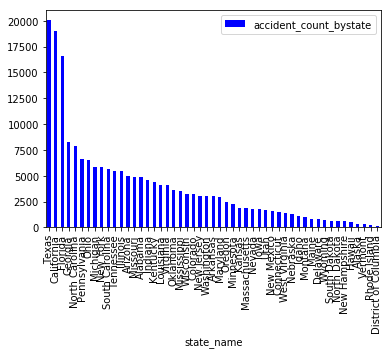

In [23]:
#state wise analysis for fatal accidents:
acci_count_bystate_sorted.plot.bar(x='state_name', y='accident_count_bystate', stacked=True, color=['blue'])

In [24]:
#Hour of accidents
acci_count_bytime=Accident_df.groupby(['hour_of_crash']).count().reset_index()
acci_count_bytime
acci_count_bytime.rename(columns={'Unnamed: 0_x': 'accident_count_bytime'}, inplace=True)
acci_count_bytime_sorted = acci_count_bytime.sort_values('accident_count_bytime',ascending=False)
acci_count_bytime_sorted.head(10)

,hour_of_crash,accident_count_bytime,state_number_x,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,Unnamed: 0_y,state_number_y,vehicle_number,driver_distracted_by,driver_distracted_by_name
17,17,11422,11422,11422,11422,11422,11422,11422,11422,11422,...,11422,11422,11422,11422,11422,11230,11230,11230,11230,11230
18,18,11349,11349,11349,11349,11349,11349,11349,11349,11349,...,11349,11349,11349,11349,11349,11148,11148,11148,11148,11148
20,20,10882,10882,10882,10882,10882,10882,10882,10882,10882,...,10882,10882,10882,10882,10882,10720,10720,10720,10720,10720
16,16,10732,10732,10732,10732,10732,10732,10732,10732,10732,...,10732,10732,10732,10732,10732,10572,10572,10572,10572,10572
19,19,10722,10722,10722,10722,10722,10722,10722,10722,10722,...,10722,10722,10722,10722,10722,10566,10566,10566,10566,10566
15,15,10619,10619,10619,10619,10619,10619,10619,10619,10619,...,10619,10619,10619,10619,10619,10494,10494,10494,10494,10494
21,21,10381,10381,10381,10381,10381,10381,10381,10381,10381,...,10381,10381,10381,10381,10381,10238,10238,10238,10238,10238
14,14,9604,9604,9604,9604,9604,9604,9604,9604,9604,...,9604,9604,9604,9604,9604,9466,9466,9466,9466,9466
13,13,9122,9122,9122,9122,9122,9122,9122,9122,9122,...,9122,9122,9122,9122,9122,9016,9016,9016,9016,9016
22,22,9095,9095,9095,9095,9095,9095,9095,9095,9095,...,9095,9095,9095,9095,9095,8964,8964,8964,8964,8964


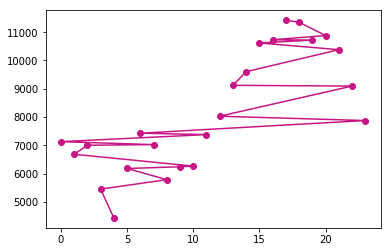

In [25]:
#Hours of accidents
acci_count_bytime_sorted = acci_count_bytime_sorted.loc[acci_count_bytime_sorted['hour_of_crash'] != 99]
plt.plot( 'hour_of_crash', 'accident_count_bytime', data=acci_count_bytime_sorted, marker='o', color='mediumvioletred')
plt.show()


In [26]:
#Location of accident 
acci_count_byloc=Accident_df.groupby(['route_signing_name']).count().reset_index()
acci_count_byloc
acci_count_byloc.rename(columns={'Unnamed: 0_x': 'accident_count_byloc'}, inplace=True)
acci_count_byloc_sorted = acci_count_byloc.sort_values('accident_count_byloc',ascending=False)
acci_count_byloc_sorted.head(10)

,route_signing_name,accident_count_byloc,state_number_x,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,Unnamed: 0_y,state_number_y,vehicle_number,driver_distracted_by,driver_distracted_by_name
6,State Highway,60178,60178,60178,60178,60178,60178,60178,60178,60178,...,60178,60178,60178,60178,60178,59452,59452,59452,59452,59452
3,Local Street – Municipality,34887,34887,34887,34887,34887,34887,34887,34887,34887,...,34887,34887,34887,34887,34887,34312,34312,34312,34312,34312
7,U.S. Highway,33722,33722,33722,33722,33722,33722,33722,33722,33722,...,33722,33722,33722,33722,33722,33290,33290,33290,33290,33290
0,County Road,28066,28066,28066,28066,28066,28066,28066,28066,28066,...,28066,28066,28066,28066,28066,27698,27698,27698,27698,27698
1,Interstate,25437,25437,25437,25437,25437,25437,25437,25437,25437,...,25437,25437,25437,25437,25437,25108,25108,25108,25108,25108
4,Local Street – Township,7208,7208,7208,7208,7208,7208,7208,7208,7208,...,7208,7208,7208,7208,7208,7044,7044,7044,7044,7044
5,Other,6475,6475,6475,6475,6475,6475,6475,6475,6475,...,6475,6475,6475,6475,6475,6354,6354,6354,6354,6354
2,Local Street – Frontage Road (Since 1994),1449,1449,1449,1449,1449,1449,1449,1449,1449,...,1449,1449,1449,1449,1449,1400,1400,1400,1400,1400
8,Unknown,710,710,710,710,710,710,710,710,710,...,710,710,710,710,710,634,634,634,634,634


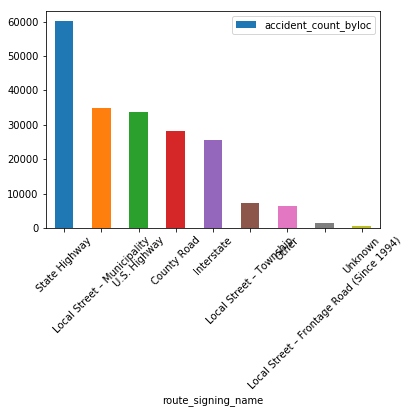

In [27]:
#Location of accident
acci_count_byloc_sorted.plot.bar(x='route_signing_name', y='accident_count_byloc', stacked=True, rot=45)

In [28]:
#Type of Collision which causes fatal accidents
acci_count_bytype=Accident_df.groupby(['manner_of_collision_name']).count().reset_index()
acci_count_bytype
acci_count_bytype.rename(columns={'Unnamed: 0_x': 'accident_count_bytype'}, inplace=True)
acci_count_bytype_sorted = acci_count_bytype.sort_values('accident_count_bytype',ascending=False)
acci_count_bytype_sorted.head(10)

,manner_of_collision_name,accident_count_bytype,state_number_x,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,Unnamed: 0_y,state_number_y,vehicle_number,driver_distracted_by,driver_distracted_by_name
3,Not Collision with Motor Vehicle in Transport ...,104190,104190,104190,104190,104190,104190,104190,104190,104190,...,104190,104190,104190,104190,104190,102424,102424,102424,102424,102424
0,Angle,42774,42774,42774,42774,42774,42774,42774,42774,42774,...,42774,42774,42774,42774,42774,42266,42266,42266,42266,42266
1,Front-to-Front,24292,24292,24292,24292,24292,24292,24292,24292,24292,...,24292,24292,24292,24292,24292,24010,24010,24010,24010,24010
2,Front-to-Rear,18403,18403,18403,18403,18403,18403,18403,18403,18403,...,18403,18403,18403,18403,18403,18236,18236,18236,18236,18236
9,Sideswipe – Same Direction,4046,4046,4046,4046,4046,4046,4046,4046,4046,...,4046,4046,4046,4046,4046,4002,4002,4002,4002,4002
8,Sideswipe – Opposite Direction,2903,2903,2903,2903,2903,2903,2903,2903,2903,...,2903,2903,2903,2903,2903,2864,2864,2864,2864,2864
5,Other (End-Swipes and Others),631,631,631,631,631,631,631,631,631,...,631,631,631,631,631,624,624,624,624,624
10,Unknown,452,452,452,452,452,452,452,452,452,...,452,452,452,452,452,436,436,436,436,436
7,Rear-to-Side,291,291,291,291,291,291,291,291,291,...,291,291,291,291,291,286,286,286,286,286
4,Not Reported,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,138,138,138,138,138


In [29]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0_x': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted.head(10)

,light_condition_name,accident_count_bylight,state_number_x,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,Unnamed: 0_y,state_number_y,vehicle_number,driver_distracted_by,driver_distracted_by_name
4,Daylight,98890,98890,98890,98890,98890,98890,98890,98890,98890,...,98890,98890,98890,98890,98890,97728,97728,97728,97728,97728
1,Dark – Not Lighted,52492,52492,52492,52492,52492,52492,52492,52492,52492,...,52492,52492,52492,52492,52492,51688,51688,51688,51688,51688
0,Dark – Lighted,35779,35779,35779,35779,35779,35779,35779,35779,35779,...,35779,35779,35779,35779,35779,35086,35086,35086,35086,35086
5,Dusk,4927,4927,4927,4927,4927,4927,4927,4927,4927,...,4927,4927,4927,4927,4927,4854,4854,4854,4854,4854
3,Dawn,3788,3788,3788,3788,3788,3788,3788,3788,3788,...,3788,3788,3788,3788,3788,3746,3746,3746,3746,3746
2,Dark – Unknown Lighting,1272,1272,1272,1272,1272,1272,1272,1272,1272,...,1272,1272,1272,1272,1272,1238,1238,1238,1238,1238
8,Unknown,823,823,823,823,823,823,823,823,823,...,823,823,823,823,823,798,798,798,798,798
6,Not Reported,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,96,96,96,96,96
7,Other,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,58,58,58,58,58


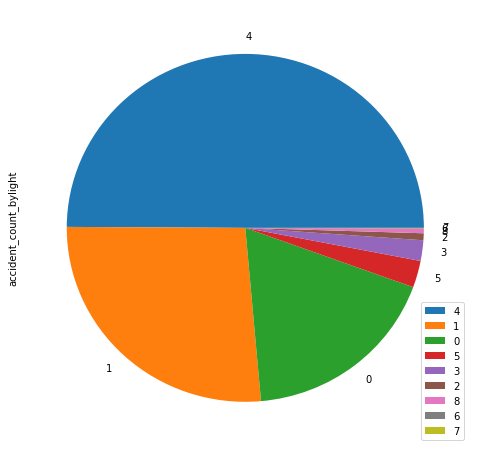

In [30]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0_x': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted.head(10)
acci_count_bylight_sorted.plot.pie(y='accident_count_bylight', figsize=(8, 8))

In [31]:
#Weather conditions during accidents
acci_count_byatm=Accident_df.groupby(['atmospheric_conditions_name']).count().reset_index()
acci_count_byatm
acci_count_byatm.rename(columns={'Unnamed: 0_x': 'accident_count_byatm'}, inplace=True)
acci_count_byatm_sorted = acci_count_byatm.sort_values('accident_count_byatm',ascending=False)
acci_count_byatm_sorted.head(10)

,atmospheric_conditions_name,accident_count_byatm,state_number_x,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,...,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,Unnamed: 0_y,state_number_y,vehicle_number,driver_distracted_by,driver_distracted_by_name
2,Clear,141733,141733,141733,141733,141733,141733,141733,141733,141733,...,141733,141733,141733,141733,141733,139836,139836,139836,139836,139836
3,Cloudy,30990,30990,30990,30990,30990,30990,30990,30990,30990,...,30990,30990,30990,30990,30990,30552,30552,30552,30552,30552
8,Rain,13535,13535,13535,13535,13535,13535,13535,13535,13535,...,13535,13535,13535,13535,13535,13320,13320,13320,13320,13320
6,Not Reported,4786,4786,4786,4786,4786,4786,4786,4786,4786,...,4786,4786,4786,4786,4786,4640,4640,4640,4640,4640
11,Snow,2313,2313,2313,2313,2313,2313,2313,2313,2313,...,2313,2313,2313,2313,2313,2258,2258,2258,2258,2258
4,"Fog, Smog, Smoke",2206,2206,2206,2206,2206,2206,2206,2206,2206,...,2206,2206,2206,2206,2206,2156,2156,2156,2156,2156
12,Unknown,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,988,988,988,988,988
10,"Sleet, Hail",524,524,524,524,524,524,524,524,524,...,524,524,524,524,524,518,518,518,518,518
7,Other,312,312,312,312,312,312,312,312,312,...,312,312,312,312,312,306,306,306,306,306
1,Blowing Snow,236,236,236,236,236,236,236,236,236,...,236,236,236,236,236,234,234,234,234,234


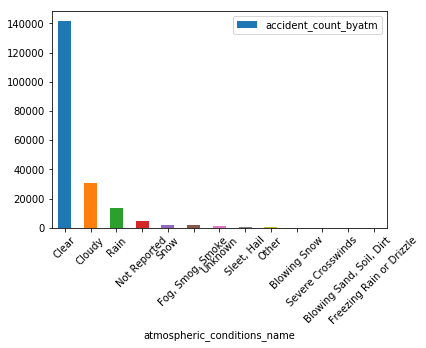

In [32]:
#Weather conditions during accidents
acci_count_byatm_sorted.plot.bar(x='atmospheric_conditions_name', y='accident_count_byatm', stacked=True, rot=45)

In [33]:
Fatal accidents are likely to happened in regular or cloudy or rainy times

SyntaxError: invalid syntax (<ipython-input-33-202752f27175>, line 1)

In [ ]:
From the above statistics on data we analysed that more number of accidents happens during the months July, August 
and October and in the evening hours. Fatal accidents  are more likely to happen on the state highways and maximum 
count for the accidents is for Texas state followed by California and Florida. 

## Visualize Attributes

In [ ]:
#simple descriptive statistics for atmospheric conditions 
Accident_df[['number_of_fatalities','atmospheric_conditions_1_name']].groupby('atmospheric_conditions_1_name').describe()

In [ ]:
#simple descriptive statistics for light condition
Accident_df[['number_of_fatalities','light_condition_name']].groupby('light_condition_name').describe()

In [ ]:

#Creates a new column to identify if there was daylight at the time of the accident. Dawn and Dusk were indicated as daylight.
#This effective turns the daylight condition column into a binary field to be used later in the violin graph
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 1 , 'yes', 'no')
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 4 , 'yes', Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 5 , 'yes', Accident_df['Day_Time_Yes_No'])
#Treats unknown and not reported as null in the data set. This is done because we cannot gain any insight of the lighting condition from these records. 
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 8 , np.nan , Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 9 , np.nan , Accident_df['Day_Time_Yes_No'])

#count and summary of new light condition field 
Accident_df.groupby(['light_condition','light_condition_name','Day_Time_Yes_No']).size()


The correlation heat map is great for finding relationship with many attributes 

In [ ]:
# plot the correlation matrix using seaborn
cmap = seaborn.diverging_palette(200, 1, as_cmap=True) # Assign color for table 
seaborn.set(style="ticks") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(35, 35))

seaborn.heatmap(Accident_df.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [ ]:
#Initiate boxplot 
ax = Accident_df.boxplot(column='consecutive_number', by = 'atmospheric_conditions_1_name')
# clean up titles
ax.set_xscale
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
#
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:


#adjust the size of the violin plot
f, ax = plt.subplots(figsize=(30, 30))

seaborn.violinplot(x="atmospheric_conditions_1_name", y="consecutive_number", hue="Day_Time_Yes_No", data=Accident_df, 
               split=True, inner="quart")

## Explore Joint Attributes

## Explore Attributes and Class

## New Features

## Exceptional Work